<a href="https://colab.research.google.com/github/AetherSparks/Customer-Churn-Prediction/blob/main/Customer_Churn_Prediction_AI_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install shap
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 23.0 MB/s eta 0:00:00


In [ ]:
from google.colab import files
uploaded = files.upload()  # This will allow you to upload your file


Saving WA_Fn-UseC_-Telco-Customer-Churn.csv to WA_Fn-UseC_-Telco-Customer-Churn.csv


In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['WA_Fn-UseC_-Telco-Customer-Churn.csv']))


In [ ]:
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.isnull().sum()  # Check for missing values
df.dropna(inplace=True)  # Drop rows with missing values


In [ ]:
# Convert 'TotalCharges' to numeric (as some rows might have incorrect types)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Drop customerID since it's not relevant for prediction
df.drop('customerID', axis=1, inplace=True)

# One-hot encoding for categorical columns
df = pd.get_dummies(df, drop_first=True)


In [ ]:
df.describe()


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


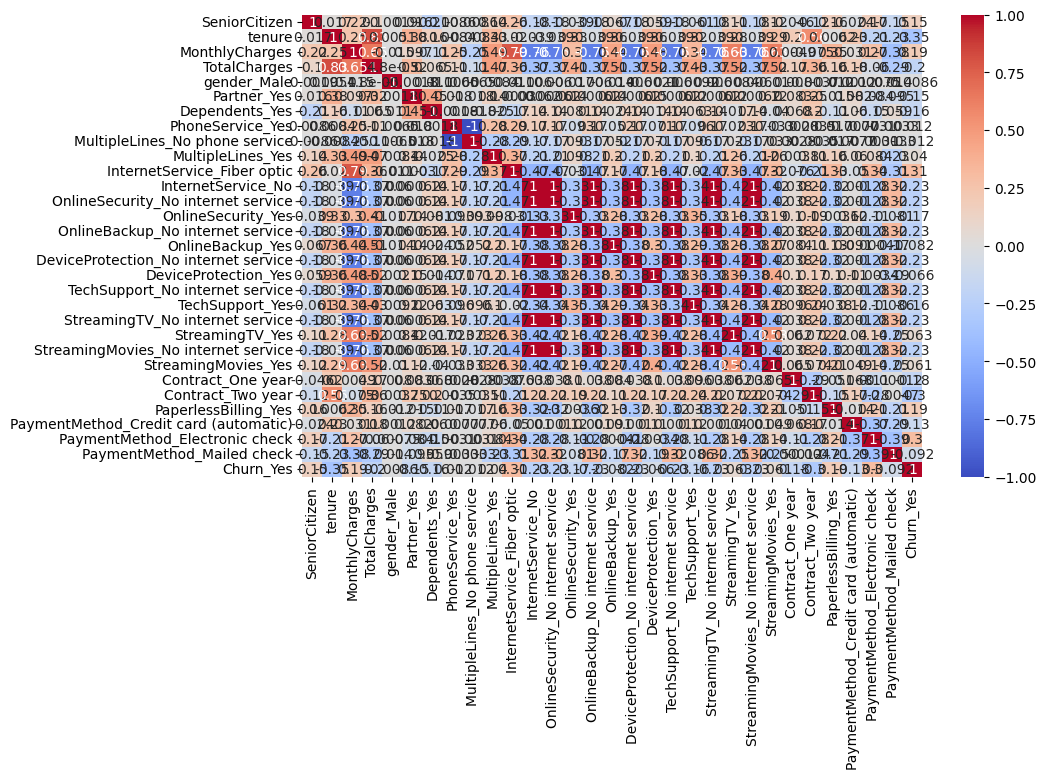

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()


<Axes: xlabel='Churn_Yes', ylabel='count'>

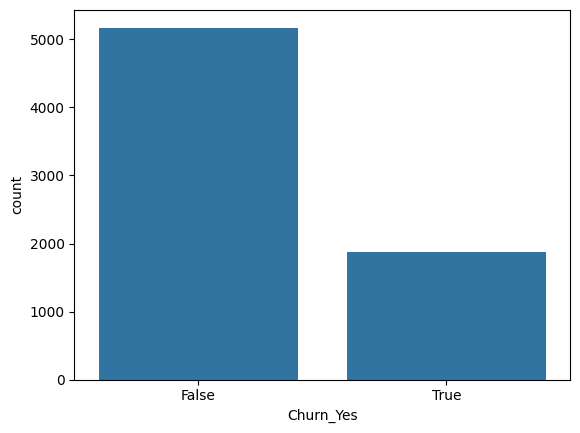

In [ ]:
sns.countplot(x='Churn_Yes', data=df)


In [ ]:
X = df.drop('Churn_Yes', axis=1)  # Features
y = df['Churn_Yes']  # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Impute missing values
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
0# Check for missing values
print(df.isnull().sum())
df.dropna(inplace=True)


SeniorCitizen                            0
tenure                                   0
MonthlyCharges                           0
TotalCharges                             0
gender_Male                              0
Partner_Yes                              0
Dependents_Yes                           0
PhoneService_Yes                         0
MultipleLines_No phone service           0
MultipleLines_Yes                        0
InternetService_Fiber optic              0
InternetService_No                       0
OnlineSecurity_No internet service       0
OnlineSecurity_Yes                       0
OnlineBackup_No internet service         0
OnlineBackup_Yes                         0
DeviceProtection_No internet service     0
DeviceProtection_Yes                     0
TechSupport_No internet service          0
TechSupport_Yes                          0
StreamingTV_No internet service          0
StreamingTV_Yes                          0
StreamingMovies_No internet service      0
StreamingMo

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [ ]:
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train, y_train)


RandomForestClassifier()

In [ ]:
y_pred = model.predict(X_test)
rf_pred = rf_model.predict(X_test)


In [ ]:
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


Logistic Regression Classification Report:
              precision    recall  f1-score   support

       False       0.86      0.90      0.88      1036
        True       0.69      0.60      0.64       373

    accuracy                           0.82      1409
   macro avg       0.77      0.75      0.76      1409
weighted avg       0.81      0.82      0.82      1409

Confusion Matrix:
[[935 101]
 [151 222]]
Accuracy: 0.8211497515968772


In [ ]:
print("Random Forest Classification Report:")
print(classification_report(y_test, rf_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, rf_pred))
print("Accuracy:", accuracy_score(y_test, rf_pred))


Random Forest Classification Report:
              precision    recall  f1-score   support

       False       0.82      0.91      0.87      1036
        True       0.65      0.46      0.54       373

    accuracy                           0.79      1409
   macro avg       0.74      0.69      0.70      1409
weighted avg       0.78      0.79      0.78      1409

Confusion Matrix:
[[945  91]
 [201 172]]
Accuracy: 0.7927608232789212


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
}

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3)
grid_search.fit(X_train, y_train)
best_rf_model = grid_search.best_estimator_


In [ ]:
y_pred = model.predict(X_test)


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nAccuracy:", accuracy_score(y_test, y_pred))


Confusion Matrix:
[[935 101]
 [151 222]]

Classification Report:
              precision    recall  f1-score   support

       False       0.86      0.90      0.88      1036
        True       0.69      0.60      0.64       373

    accuracy                           0.82      1409
   macro avg       0.77      0.75      0.76      1409
weighted avg       0.81      0.82      0.82      1409


Accuracy: 0.8211497515968772


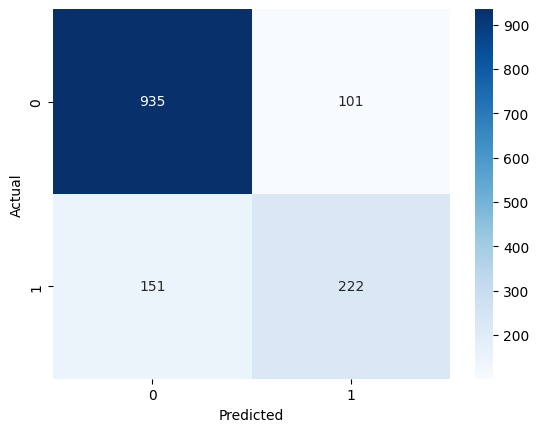

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train, y_train)

rf_pred = rf_model.predict(X_test)

print("Random Forest Classification Report:")
print(classification_report(y_test, rf_pred))

print("\nAccuracy:", accuracy_score(y_test, rf_pred))


Random Forest Classification Report:
              precision    recall  f1-score   support

       False       0.83      0.91      0.87      1036
        True       0.65      0.47      0.55       373

    accuracy                           0.79      1409
   macro avg       0.74      0.69      0.71      1409
weighted avg       0.78      0.79      0.78      1409


Accuracy: 0.7920511000709723


In [ ]:
from sklearn.model_selection import GridSearchCV

# Example: Hyperparameter tuning for RandomForestClassifier
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, cv=3)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)


Best Parameters: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 50}


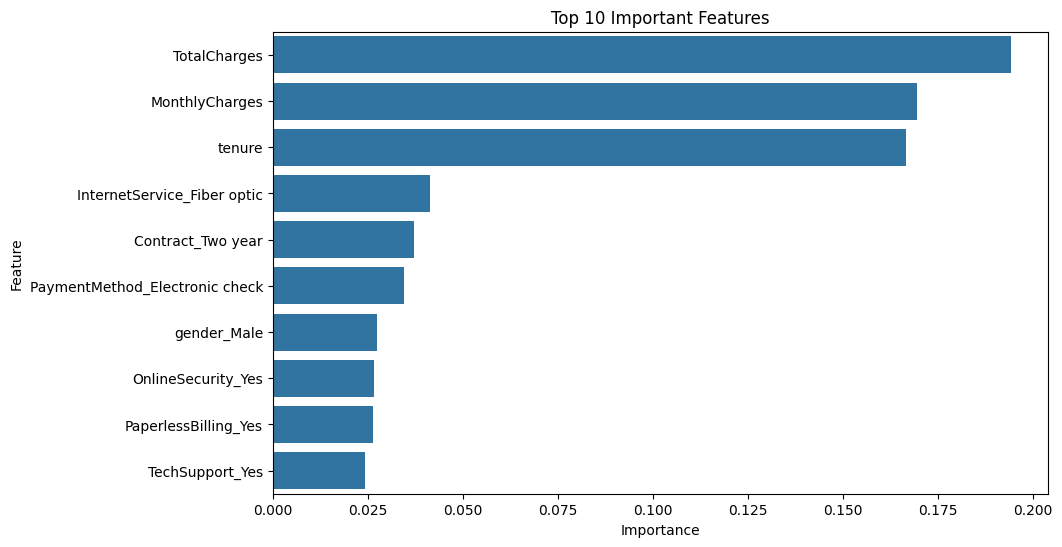

In [ ]:
# Feature Importance for RandomForest
importances = rf_model.feature_importances_
features = X.columns
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importance_df.sort_values(by='Importance', ascending=False, inplace=True)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10))
plt.title('Top 10 Important Features')
plt.show()


In [ ]:
# Check for missing values in each column
print(X.isnull().sum())


X = X.dropna()  # Drops rows with NaN values
y = y.loc[X.index]  # Align the target variable with the new X


from sklearn.impute import SimpleImputer

# Use the mean to fill missing values
imputer = SimpleImputer(strategy='mean')  # You can also use 'median' or 'most_frequent'
X_imputed = imputer.fit_transform(X)

# Now use the imputed data for your model


SeniorCitizen                             0
tenure                                    0
MonthlyCharges                            0
TotalCharges                             11
gender_Male                               0
Partner_Yes                               0
Dependents_Yes                            0
PhoneService_Yes                          0
MultipleLines_No phone service            0
MultipleLines_Yes                         0
InternetService_Fiber optic               0
InternetService_No                        0
OnlineSecurity_No internet service        0
OnlineSecurity_Yes                        0
OnlineBackup_No internet service          0
OnlineBackup_Yes                          0
DeviceProtection_No internet service      0
DeviceProtection_Yes                      0
TechSupport_No internet service           0
TechSupport_Yes                           0
StreamingTV_No internet service           0
StreamingTV_Yes                           0
StreamingMovies_No internet serv

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X, y, cv=5)  # 5-fold cross-validation
print("Cross-validation accuracy scores:", scores)
print("Mean accuracy:", scores.mean())


Cross-validation accuracy scores: [0.80597015 0.80525942 0.79089616 0.80938834 0.80654339]
Mean accuracy: 0.8036114893931077


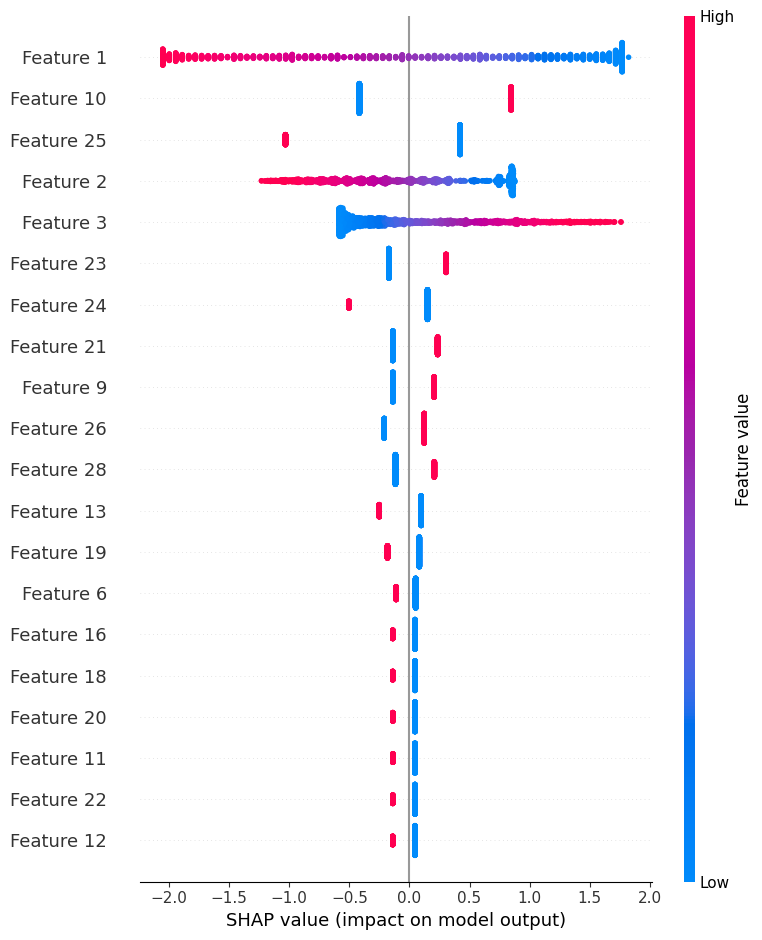

In [ ]:
import shap

# Create a SHAP explainer based on your LogisticRegression model
explainer = shap.LinearExplainer(model, X_train)

# Calculate SHAP values for the test set
shap_values = explainer.shap_values(X_test)

# Plot the SHAP summary plot
shap.summary_plot(shap_values, X_test)


In [ ]:
import joblib

# Save the model
joblib.dump(model, 'logistic_regression_churn_model.pkl')

# To load the model back later
# loaded_model = joblib.load('logistic_regression_churn_model.pkl')


['logistic_regression_churn_model.pkl']

In [ ]:
########################################################################################################################################################

In [ ]:


# from google.colab import files
# uploaded = files.upload()
# file_path = 'WA_Fn-UseC_-Telco
# -Customer-Churn.csv'

In [ ]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
# import pandas as pd

# # Load the dataset
# df = pd.read_csv(file_path)

# # Print column names to check for spaces or inconsistencies
# print(df.columns)

In [ ]:
# # Check the unique values in the 'Churn' column
# print(df['Churn'].unique())

# # Convert 'Churn' to 1 and 0 for further analysis
# df['Churn'] = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)


In [ ]:
# # General info about the dataset
# df.info()

# # Check for missing values
# df.isnull().sum()


In [ ]:
# # Drop rows with missing values (if applicable)
# df.dropna(inplace=True)

# # Drop unnecessary columns (like CustomerID or other identifiers, if they exist)
# df.drop(['customerID'], axis=1, inplace=True)  # Example, if 'CustomerID' is irrelevant.


In [ ]:
# # Convert categorical columns into numerical data (if any)
# df = pd.get_dummies(df, drop_first=True)  # This automatically converts categorical variables into dummy variables.


In [ ]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# plt.figure(figsize=(12,8))
# sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
# plt.show()



In [ ]:
# # Countplot to visualize 'Churn'
# sns.countplot(x='Churn', data=df)
# plt.show()


In [ ]:
# # Split the data into features (X) and target (y)
# X = df.drop('Churn', axis=1)  # Replace 'Churn' with your target column
# y = df['Churn']

# # Split into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# # Scale the features using StandardScaler
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)


In [ ]:
# # Train a Random Forest model
# model = RandomForestClassifier(n_estimators=100, random_state=42)
# model.fit(X_train, y_train)


In [ ]:
# # Make predictions
# y_pred = model.predict(X_test)

# # Evaluate the model
# print("Confusion Matrix:")
# print(confusion_matrix(y_test, y_pred))

# print("\nClassification Report:")
# print(classification_report(y_test, y_pred))

# print("\nAccuracy Score:")
# print(accuracy_score(y_test, y_pred))


In [ ]:
# from sklearn.model_selection import GridSearchCV

# # Set up parameter grid for tuning
# param_grid = {
#     'n_estimators': [100, 200, 300],
#     'max_depth': [None, 10, 20, 30],
#     'min_samples_split': [2, 5, 10]
# }

# # GridSearchCV
# grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
# grid_search.fit(X_train, y_train)

# # Best hyperparameters
# print("Best Parameters:", grid_search.best_params_)
